In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as sch 

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


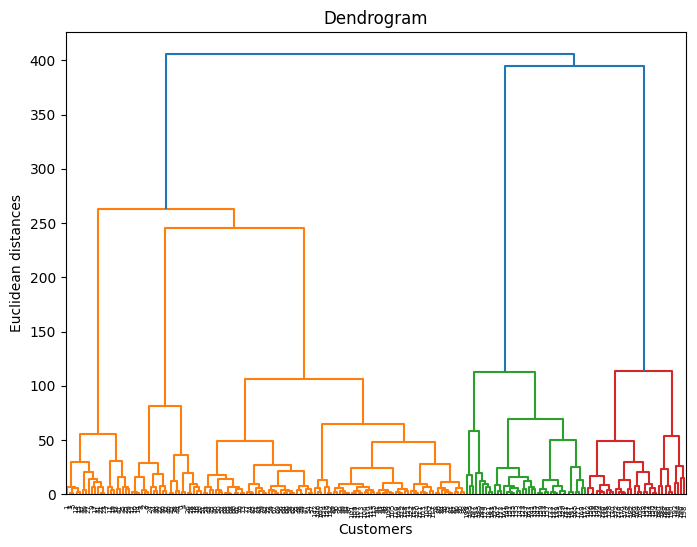

In [7]:
#Dendogram
plt.figure(figsize=(8,6))
dendogram = sch.dendrogram(sch.linkage(X , method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [8]:
#Agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)


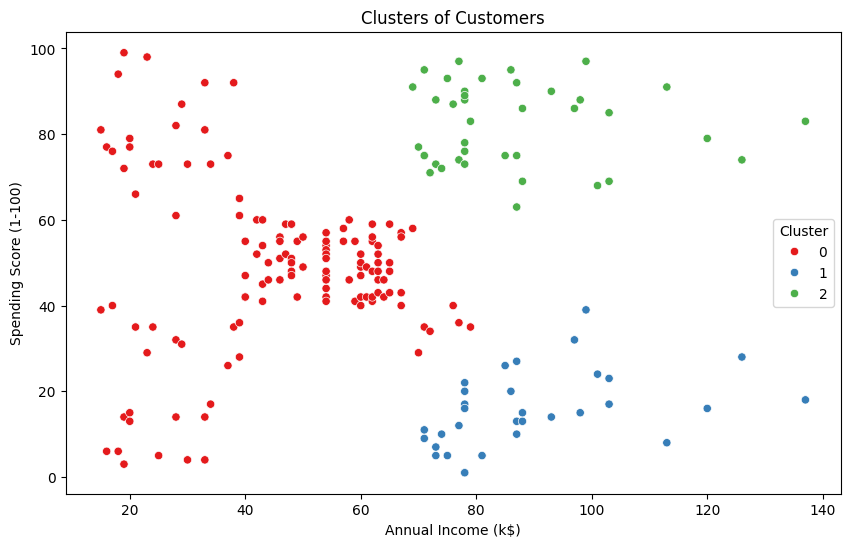

In [9]:
clustered_df = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])
clustered_df["Cluster"] = y_hc

plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1")
plt.title("Clusters of Customers")
plt.show()


Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


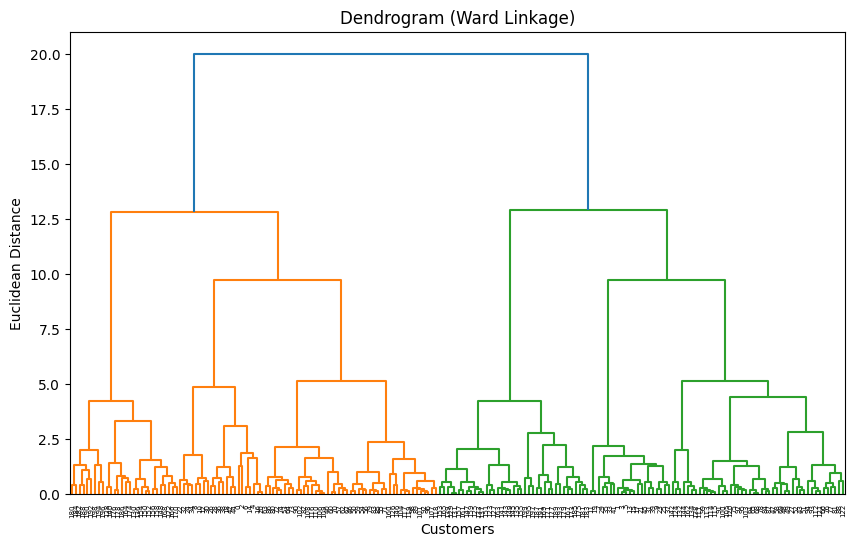

Linkage=ward → Silhouette Score: 0.390
Linkage=complete → Silhouette Score: 0.400
Linkage=average → Silhouette Score: 0.410
Linkage=single → Silhouette Score: 0.003


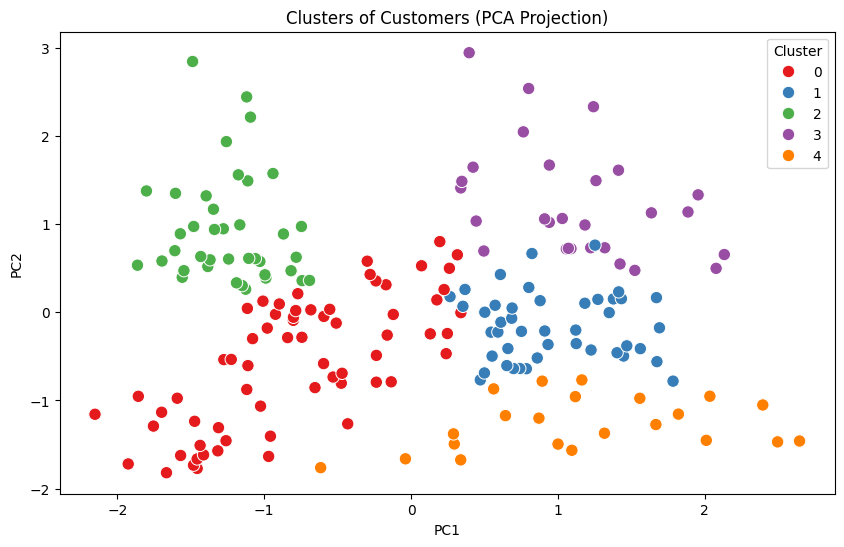

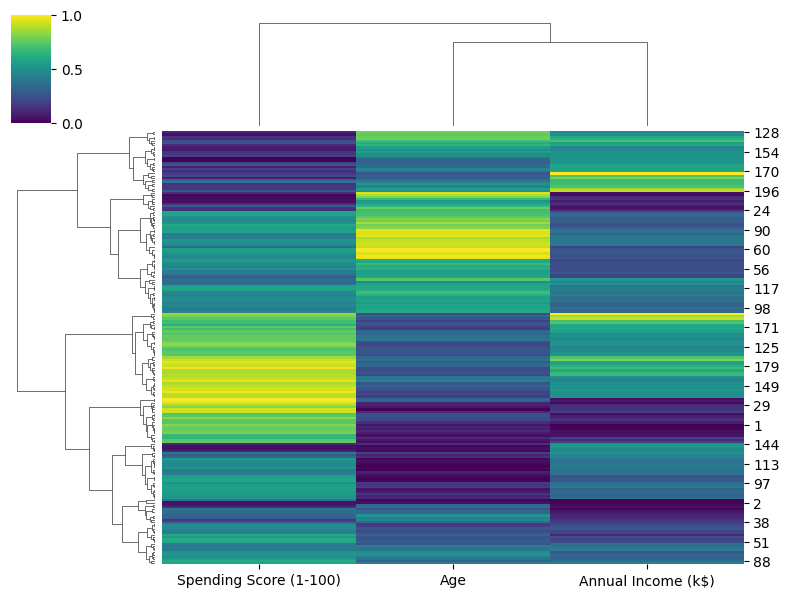

In [ ]:
# ======================================
# Advanced Hierarchical Clustering (Mall Customers Task)
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---------------------------
# 1. Load Dataset
# ---------------------------
url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Mall_Customers.csv"
df = pd.read_csv(url)

print("Dataset Preview:")
print(df.head())

# ---------------------------
# 2. Feature Selection
# ---------------------------
# Let's use more features this time: Age, Income, Spending Score
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3. Dendrogram (Ward linkage)
# ---------------------------
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="ward"))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# ---------------------------
# 4. Compare Linkage Methods
# ---------------------------
linkages = ["ward", "complete", "average", "single"]
for link in linkages:
    hc = AgglomerativeClustering(n_clusters=5, linkage=link)
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Linkage={link} → Silhouette Score: {score:.3f}")

# ---------------------------
# 5. PCA for 2D Visualization
# ---------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Best linkage (let’s pick ward for visualization)
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels = hc.fit_predict(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=80)
plt.title("Clusters of Customers (PCA Projection)")
plt.show()

# ---------------------------
# 6. Heatmap with Clustering 
# ---------------------------
sns.clustermap(X, method="ward", metric="euclidean", cmap="viridis", figsize=(8, 6), standard_scale=1)
plt.show()
